In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import random
import re
import seaborn as sns

## Data Processing

In [5]:
df = pd.read_csv(r'acw_user_data.csv', delimiter=',')
df[0:]

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (£),Retired,Yearly Salary (£),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


In [60]:
for c in df.columns:
    print(c)

Address Street
Address City
Address Postcode
Age (Years)
Distance Commuted to Work (miles)
Employer Company
Credit Card Start Date
Credit Card Expiry Date
Credit Card Number
Credit Card CVV
Dependants
First Name
Bank IBAN
Last Name
Marital Status
Yearly Pension (£)
Retired
Yearly Salary (£)
Sex
Vehicle Make
Vehicle Model
Vehicle Year
Vehicle Type


In [118]:
df.isnull().sum()

Address Street                         0
Address City                           0
Address Postcode                       0
Age (Years)                            0
Distance Commuted to Work (miles)      0
Employer Company                     246
Credit Card Start Date                 0
Credit Card Expiry Date                0
Credit Card Number                     0
Credit Card CVV                        0
Dependants                            19
First Name                             0
Bank IBAN                              0
Last Name                              0
Marital Status                         0
Yearly Pension (£)                     0
Retired                                0
Yearly Salary (£)                      0
Sex                                    0
Vehicle Make                           0
Vehicle Model                          0
Vehicle Year                           0
Vehicle Type                           0
dtype: int64

In [61]:
df.isnull().count()

Address Street                       1000
Address City                         1000
Address Postcode                     1000
Age (Years)                          1000
Distance Commuted to Work (miles)    1000
Employer Company                     1000
Credit Card Start Date               1000
Credit Card Expiry Date              1000
Credit Card Number                   1000
Credit Card CVV                      1000
Dependants                           1000
First Name                           1000
Bank IBAN                            1000
Last Name                            1000
Marital Status                       1000
Yearly Pension (£)                   1000
Retired                              1000
Yearly Salary (£)                    1000
Sex                                  1000
Vehicle Make                         1000
Vehicle Model                        1000
Vehicle Year                         1000
Vehicle Type                         1000
dtype: int64

In [63]:
df.isnull().any()

Address Street                       False
Address City                         False
Address Postcode                     False
Age (Years)                          False
Distance Commuted to Work (miles)    False
Employer Company                      True
Credit Card Start Date               False
Credit Card Expiry Date              False
Credit Card Number                   False
Credit Card CVV                      False
Dependants                            True
First Name                           False
Bank IBAN                            False
Last Name                            False
Marital Status                       False
Yearly Pension (£)                   False
Retired                              False
Yearly Salary (£)                    False
Sex                                  False
Vehicle Make                         False
Vehicle Model                        False
Vehicle Year                         False
Vehicle Type                         False
dtype: bool

In [64]:
#NaaN value
df2 = df[df.isna().any(axis=1)]
df2

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (£),Retired,Yearly Salary (£),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
7,81 Goodwin dam,Griffinstad,G3 7ZX,67,0.00,NaN,07/15,04/27,213199489183130,389,...,Evans,single,28075,True,27964,Male,Volvo,Express 3500 Passenger,2013,SUV
9,Studio 77c Gail tunnel,Garyberg,S7W 4DW,87,0.00,NaN,10/13,10/13,213198388220332,766,...,Hamilton,single,29587,True,66157,Male,Dodge,Impreza,2015,Sedan
14,8 Bray row,Daviestown,S2H 5RE,78,0.00,NaN,10/12,12/19,4548406264381245,22,...,John,married or civil partner,24712,True,59891,Female,Nissan,LC,2012,SUV
21,9 Hargreaves loaf,New Keith,OX85 1NN,40,11.98,Frost-Howard,09/18,02/23,3577676608962779,426,...,Marshall,married or civil partner,0,False,44434,Female,MAZDA,Tundra Regular Cab,2001,Sedan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,71 Smith stravenue,Lesleytown,MK0 1HD,83,0.00,NaN,08/20,11/21,38175563559869,684,...,Mistry,married or civil partner,16436,True,66220,Male,GMC,Venture Cargo,2018,SUV
986,Studio 51 Scott summit,East Shane,N2 8WH,90,0.00,NaN,10/12,01/18,2711366246819743,863,...,Thomas,married or civil partner,25776,True,26654,Male,Kia,3 Series,2003,"Coupe, Convertible"
988,Studio 6 Leslie keys,Andreastad,KA4X 1QR,76,0.00,NaN,10/17,12/28,675992264696,909,...,Goddard,married or civil partner,28990,True,48597,Male,Scion,Vibe,2005,Wagon
994,Flat 35h Kathleen extensions,Lake Owenmouth,G3 8PL,90,0.00,NaN,06/15,07/26,213131632975005,911,...,Sykes,single,15650,True,49928,Male,Nissan,Prizm,1994,Van/Minivan


In [65]:
len(df2)

261

In [66]:
#Validation
246+19

265

In [20]:
credit_detail = pd.DataFrame(df, columns={'Credit Card Number','Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card CVV', 'Bank IBAN'})
credit_detail

,Credit Card Start Date,Bank IBAN,Credit Card CVV,Credit Card Number,Credit Card Expiry Date
0,08/18,GB62PQKB71416034141571,875,676373692463,11/27
1,08/12,GB37UMCO54540228728019,583,4529436854129855,11/26
2,11/19,GB40CVUE84011545859591,422,4091726363083888495,07/27
3,10/17,GB40YPKK71613332239280,669,4671332769487632633,04/18
4,04/19,GB95WAYW31715898077181,659,2245094149128526,11/27
...,...,...,...,...,...
995,04/19,GB45UVZH05043505193524,908,3563802099155576,08/26
996,05/12,GB88EGZV32518465934497,675,3591311819315276,07/28
997,01/13,GB81SVHK17718594367943,679,3584931475767707,05/29
998,04/19,GB14LLBD59118062249339,775,4090311300716168,05/23


In [23]:
vechile = pd.DataFrame(df, columns={'Vehicle Make','Vehicle Model','Vehicle Year','Vehicle Type' })
vechile

,Vehicle Year,Vehicle Model,Vehicle Type,Vehicle Make
0,2009,Bonneville,Pickup,Hyundai
1,1996,ATS,Coupe,Nissan
2,2015,Achieva,"Convertible, Coupe",GMC
3,1994,F150 SuperCrew Cab,Pickup,Scion
4,2020,Outback,SUV,Buick
...,...,...,...,...
995,2015,Convertible,Van/Minivan,Saturn
996,2015,Yukon,Van/Minivan,Toyota
997,2020,S6,Sedan,Ford
998,2015,Ram 1500 Quad Cab,Pickup,Scion


In [26]:
address = pd.DataFrame(df, columns={'Address Street','Address City','Address Postcode'})
address

,Address Postcode,Address Street,Address City
0,S71 7XZ,70 Lydia isle,Lake Conor
1,L2 7BT,00 Wheeler wells,Chapmanton
2,ME3N 1GH,Studio 33K Joel walk,Randallborough
3,E10 9RJ,Studio 46S Bethany lights,East Reece
4,WS2 9SN,Flat 3 Christine views,Fletcherstad
...,...,...,...
995,E9 0HB,Studio 6 Heather prairie,North Amelia
996,E7 4UJ,Flat 3 Davies run,Greenshire
997,L62 8TA,Flat 7 Barber motorway,Burrowsshire
998,NP4 1JL,00 Tony forks,Abbiebury


In [68]:
salary = df['Yearly Salary (£)']
salary.describe()

count     1000.000000
mean     57814.078000
std      23270.417139
min      17046.000000
25%      39089.750000
50%      57518.000000
75%      77211.500000
max      98915.000000
Name: Yearly Salary (£), dtype: float64

In [76]:
df['Employer Company'] = df['Employer Company'].str.replace(',','')
df.isnull().sum()

Address Street                         0
Address City                           0
Address Postcode                       0
Age (Years)                            0
Distance Commuted to Work (miles)      0
Employer Company                     246
Credit Card Start Date                 0
Credit Card Expiry Date                0
Credit Card Number                     0
Credit Card CVV                        0
Dependants                            19
First Name                             0
Bank IBAN                              0
Last Name                              0
Marital Status                         0
Yearly Pension (£)                     0
Retired                                0
Yearly Salary (£)                      0
Sex                                    0
Vehicle Make                           0
Vehicle Model                          0
Vehicle Year                           0
Vehicle Type                           0
dtype: int64

### Univarient plot

#### Age count and bin_width of 5

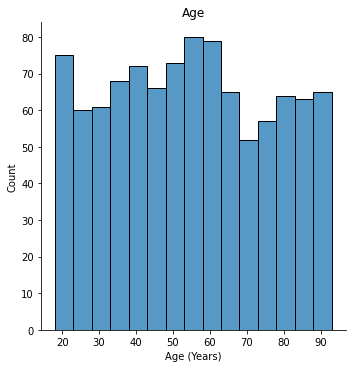

In [87]:
%matplotlib inline
figure_1=sns.displot(data=df, x='Age (Years)', binwidth=5).set(title='Age')

#### Dependants, data fixing errors with seaborn itself

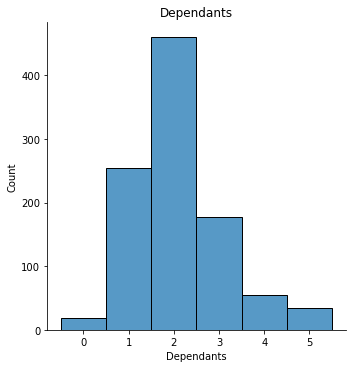

In [56]:
dep = df['Dependants']
dep.fillna(value='0', inplace=True)
dep.isnull().any()
figure_2=sns.displot(data=df, x='Dependants').set(title='Dependants')

#### Age of default bins, conditioned on Martial status

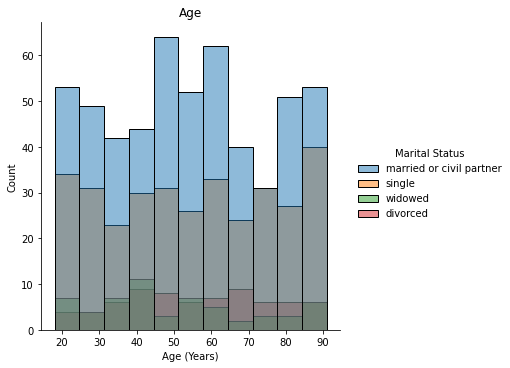

In [93]:
figure_3=sns.displot(data=df, x='Age (Years)', hue='Marital Status').set(title='Age')

#### Age against salary

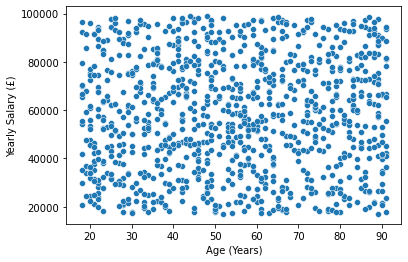

In [111]:
scat_0=sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (£)')

#### Age against salary conditional by dependants

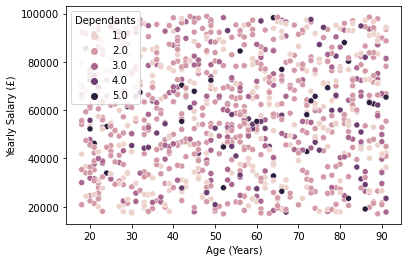

In [125]:
scat_1=sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (£)', hue='Dependants')

#### Age against salary conditional by Marital status

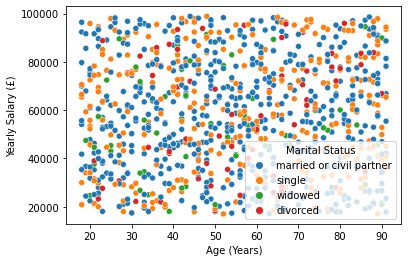

In [126]:
scat_1=sns.scatterplot(data=df, x='Age (Years)', y='Yearly Salary (£)', hue='Marital Status')

#### Commuted distance against salary

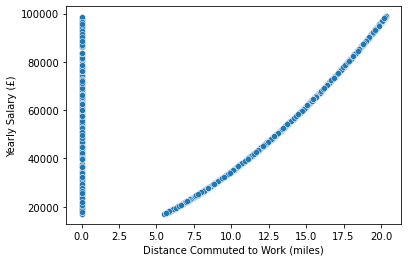

In [112]:
scat_3 = sns.scatterplot(data=df, x='Distance Commuted to Work (miles)', y='Yearly Salary (£)')